In [94]:
%pip install requests
%pip install pandas
%pip install seaborn 
%pip install matplot
%pip install ipython
%pip install Jinja2

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# 1) Extrair dados de uma das APIs abaixo

In [95]:
import requests

# Sua chave da API da NASA
api_key = "1lVYAKcMEw6Fabw8quxQDM2vcVMtMANvYP3uL7xN"


# URL da API Near Earth Object Web Service (NEO)
url = "https://api.nasa.gov/neo/rest/v1/feed"

# Definindo os parâmetros da requisição: data inicial e final
params = {
    "start_date": "2024-10-15",  # Data inicial
    "end_date": "2024-10-22",    # Data final
    "api_key": api_key
}

# Fazendo a requisição GET para a API
response = requests.get(url, params=params)

# Verificando se a requisição foi bem-sucedida
if response.status_code == 200:
    data = response.json()
else:
    print(f"Erro ao acessar a API: {response.status_code}")

# Extraindo os objetos próximos à Terra
neo_data = data['near_earth_objects']

1. Dados do asteroide:

Esses são os parâmetros principais sobre o próprio asteroide:

	•	id: Identificador único do asteroide.
	•	neo_reference_id: Um identificador alternativo do asteroide.
	•	name: Nome do asteroide.
	•	nasa_jpl_url: URL para a página do objeto no JPL da NASA.
	•	absolute_magnitude_h: A magnitude absoluta do asteroide.
	•	estimated_diameter: Contém valores para o diâmetro estimado em diferentes unidades:
	•	kilometers, meters, miles, feet: Cada uma com os subcampos estimated_diameter_min e estimated_diameter_max.
	•	is_potentially_hazardous_asteroid: Booleano que indica se o asteroide é considerado potencialmente perigoso.

2. Dados de aproximação:

Esses parâmetros fornecem detalhes sobre a aproximação do asteroide à Terra ou a outros corpos celestes:

	•	close_approach_data: Lista de dados de aproximação, onde cada aproximação tem:
	•	close_approach_date: A data da aproximação.
	•	close_approach_date_full: Data completa com hora.
	•	epoch_date_close_approach: A data de aproximação em milissegundos desde a época (Unix Time).
	•	relative_velocity: Velocidade relativa do asteroide em várias unidades:
	•	kilometers_per_second, kilometers_per_hour, miles_per_hour.
	•	miss_distance: A distância mínima de aproximação em diferentes unidades:
	•	astronomical: Unidades astronômicas (UA).
	•	lunar: Distância em termos de distâncias lunares (LD).
	•	kilometers, miles: Distância em quilômetros ou milhas.
	•	orbiting_body: O corpo celeste em torno do qual o asteroide está orbitando (geralmente a Terra).

3. Dados orbitais:

Essa seção oferece uma visão detalhada sobre os parâmetros orbitais do asteroide, incluindo informações que podem ser úteis para cálculos astronômicos:

	•	orbital_data: Um dicionário contendo detalhes sobre a órbita do asteroide:
	•	orbit_id: Identificador da órbita.
	•	orbit_determination_date: Data de determinação da órbita.
	•	first_observation_date: Data da primeira observação registrada.
	•	last_observation_date: Data da última observação registrada.
	•	data_arc_in_days: Arco de tempo de observação em dias.
	•	observations_used: Número de observações usadas para calcular a órbita.
	•	orbit_uncertainty: Incerteza da órbita.
	•	minimum_orbit_intersection: Distância mínima de interseção orbital.
	•	jupiter_tisserand_invariant: Invariante de Tisserand com relação a Júpiter.
	•	epoch_osculation: Época da osculação (momento específico em que a posição e a velocidade do asteroide são conhecidas).
	•	eccentricity: Excentricidade da órbita.
	•	semi_major_axis: Semi-eixo maior da órbita.
	•	inclination: Inclinação da órbita em relação ao plano da eclíptica.
	•	ascending_node_longitude: Longitude do nó ascendente.
	•	orbital_period: Período orbital em dias.
	•	perihelion_distance: Distância no periélio (ponto mais próximo do Sol).
	•	perihelion_argument: Argumento do periélio.
	•	aphelion_distance: Distância no afélio (ponto mais distante do Sol).
	•	perihelion_time: Tempo no periélio.
	•	mean_anomaly: Anomalia média.
	•	mean_motion: Movimento médio (taxa angular).
	•	equinox: Equinócio de referência.

4. Classificação e status:

Esses parâmetros podem fornecer mais contexto sobre o status do asteroide em termos de sua classificação:

	•	is_sentry_object: Booleano que indica se o asteroide faz parte do sistema Sentry da NASA (que monitora objetos com potencial de impacto).
	•	sentry_data: Informações adicionais sobre a classificação do asteroide no sistema Sentry.

In [96]:
# Exibir o número de objetos próximos à Terra retornados pela API
print(f"Número de objetos próximos à Terra retornados: {data['element_count']}")

Número de objetos próximos à Terra retornados: 163


# 2) Formatar os dados desta API de forma tabular utilizando a biblioteca Pandas

In [97]:
import pandas as pd

asteroids_list = []
for date in neo_data:
    for asteroid in neo_data[date]:
        asteroids_list.append({

            'id': asteroid['id'],
            'neo_reference_id': asteroid['neo_reference_id'],
            'name': asteroid['name'],
            'nasa_jpl_url': asteroid['nasa_jpl_url'],
            'absolute_magnitude': asteroid['absolute_magnitude_h'],
            'estimated_diameter_min_km': asteroid['estimated_diameter']['kilometers']['estimated_diameter_min'],
            'estimated_diameter_max_km': asteroid['estimated_diameter']['kilometers']['estimated_diameter_max'],
            'is_potentially_hazardous': asteroid['is_potentially_hazardous_asteroid'],

            'close_approach_date': asteroid['close_approach_data'][0]['close_approach_date'],
            'close_approach_date_full': asteroid['close_approach_data'][0].get('close_approach_date_full', None),
            'epoch_date_close_approach': asteroid['close_approach_data'][0].get('epoch_date_close_approach', None),
            'relative_velocity_km_s': asteroid['close_approach_data'][0]['relative_velocity']['kilometers_per_second'],
            'relative_velocity_km_h': asteroid['close_approach_data'][0]['relative_velocity']['kilometers_per_hour'],
            'miss_distance_astronomical': asteroid['close_approach_data'][0]['miss_distance']['astronomical'],
            'miss_distance_lunar': asteroid['close_approach_data'][0]['miss_distance']['lunar'],
            'miss_distance_km': asteroid['close_approach_data'][0]['miss_distance']['kilometers'],
            'miss_distance_miles': asteroid['close_approach_data'][0]['miss_distance']['miles'],
            'orbiting_body': asteroid['close_approach_data'][0]['orbiting_body'],

            'orbit_id': asteroid.get('orbital_data', {}).get('orbit_id'),
            'first_observation_date': asteroid.get('orbital_data', {}).get('first_observation_date'),
            'last_observation_date': asteroid.get('orbital_data', {}).get('last_observation_date'),
            'eccentricity': asteroid.get('orbital_data', {}).get('eccentricity'),
            'semi_major_axis': asteroid.get('orbital_data', {}).get('semi_major_axis'),
            'inclination_deg': asteroid.get('orbital_data', {}).get('inclination'),
            'ascending_node_longitude': asteroid.get('orbital_data', {}).get('ascending_node_longitude'),
            'orbital_period_days': asteroid.get('orbital_data', {}).get('orbital_period'),
            'perihelion_distance': asteroid.get('orbital_data', {}).get('perihelion_distance'),
            'mean_anomaly': asteroid.get('orbital_data', {}).get('mean_anomaly'),
            'mean_motion': asteroid.get('orbital_data', {}).get('mean_motion')
        })

df_asteroids = pd.DataFrame(asteroids_list)
df_asteroids.head()

,id,neo_reference_id,name,nasa_jpl_url,absolute_magnitude,estimated_diameter_min_km,estimated_diameter_max_km,is_potentially_hazardous,close_approach_date,close_approach_date_full,...,first_observation_date,last_observation_date,eccentricity,semi_major_axis,inclination_deg,ascending_node_longitude,orbital_period_days,perihelion_distance,mean_anomaly,mean_motion
0,2412977,2412977,412977 (1990 UO),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,19.57,0.324007,0.724503,False,2024-10-20,2024-Oct-20 10:19,...,None,None,None,None,None,None,None,None,None,None
1,2495615,2495615,495615 (2015 PQ291),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,17.70,0.766576,1.714115,False,2024-10-20,2024-Oct-20 02:46,...,None,None,None,None,None,None,None,None,None,None
2,2526742,2526742,526742 (2006 WR127),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,20.49,0.212107,0.474286,False,2024-10-20,2024-Oct-20 17:36,...,None,None,None,None,None,None,None,None,None,None
3,3694787,3694787,(2014 US115),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,24.60,0.031956,0.071456,False,2024-10-20,2024-Oct-20 04:15,...,None,None,None,None,None,None,None,None,None,None
4,3719472,3719472,(2015 KG19),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,23.39,0.055790,0.124750,False,2024-10-20,2024-Oct-20 09:27,...,None,None,None,None,None,None,None,None,None,None


In [98]:
total_rows = df_asteroids.shape[0]
print(f"Total de linhas: {total_rows}\n")

missing_data = df_asteroids.isnull().sum()

for column, missing_count in missing_data.items():
    if missing_count > 0:
        print(f"{column}: {missing_count}")

Total de linhas: 163

orbit_id: 163
first_observation_date: 163
last_observation_date: 163
eccentricity: 163
semi_major_axis: 163
inclination_deg: 163
ascending_node_longitude: 163
orbital_period_days: 163
perihelion_distance: 163
mean_anomaly: 163
mean_motion: 163


# 3) Criar gráficos, análises, tabelas, sobre os dados extraídos, utilizando quaisquer bibliotecas que o candidato ache interessante (e.g. Seaborn. Matplotlib, etc). Não é necessário ser um trabalho extenso, basta 3-6 itens.

## Pré-processamento 

In [99]:
df_asteroids_cleaned = df_asteroids.dropna(axis=1)

total_columns = df_asteroids_cleaned.shape[1]
print(f"Total de colunas após remover as que têm valores faltantes: {total_columns}\n")

df_asteroids_cleaned.head()

Total de colunas após remover as que têm valores faltantes: 18



,id,neo_reference_id,name,nasa_jpl_url,absolute_magnitude,estimated_diameter_min_km,estimated_diameter_max_km,is_potentially_hazardous,close_approach_date,close_approach_date_full,epoch_date_close_approach,relative_velocity_km_s,relative_velocity_km_h,miss_distance_astronomical,miss_distance_lunar,miss_distance_km,miss_distance_miles,orbiting_body
0,2412977,2412977,412977 (1990 UO),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,19.57,0.324007,0.724503,False,2024-10-20,2024-Oct-20 10:19,1729419540000,41.1627077851,148185.7480262956,0.4671664393,181.7277448877,69887104.254764291,43425832.9012815758,Earth
1,2495615,2495615,495615 (2015 PQ291),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,17.70,0.766576,1.714115,False,2024-10-20,2024-Oct-20 02:46,1729392360000,22.8658455755,82317.0440716297,0.3502323914,136.2404002546,52394019.758446318,32556134.2298944684,Earth
2,2526742,2526742,526742 (2006 WR127),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,20.49,0.212107,0.474286,False,2024-10-20,2024-Oct-20 17:36,1729445760000,14.8481835153,53453.4606550249,0.2754597714,107.1538510746,41208195.072126918,25605585.0710627484,Earth
3,3694787,3694787,(2014 US115),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,24.60,0.031956,0.071456,False,2024-10-20,2024-Oct-20 04:15,1729397700000,19.1626339588,68985.4822516714,0.3832701874,149.0921028986,57336403.669540838,35627189.1855380444,Earth
4,3719472,3719472,(2015 KG19),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,23.39,0.055790,0.124750,False,2024-10-20,2024-Oct-20 09:27,1729416420000,7.6123070871,27404.305513672,0.2265469633,88.1267687237,33890943.164648171,21058855.5704039198,Earth


In [100]:
df_asteroids_cleaned = df_asteroids.dropna(axis=1)
df_asteroids_cleaned = df_asteroids.drop(columns=['neo_reference_id', 'nasa_jpl_url'])

total_columns = df_asteroids_cleaned.shape[1]
print(f"Total de colunas após remover as que têm valores faltantes ou None: {total_columns}\n")

df_asteroids_cleaned.head()

Total de colunas após remover as que têm valores faltantes ou None: 27



,id,name,absolute_magnitude,estimated_diameter_min_km,estimated_diameter_max_km,is_potentially_hazardous,close_approach_date,close_approach_date_full,epoch_date_close_approach,relative_velocity_km_s,...,first_observation_date,last_observation_date,eccentricity,semi_major_axis,inclination_deg,ascending_node_longitude,orbital_period_days,perihelion_distance,mean_anomaly,mean_motion
0,2412977,412977 (1990 UO),19.57,0.324007,0.724503,False,2024-10-20,2024-Oct-20 10:19,1729419540000,41.1627077851,...,None,None,None,None,None,None,None,None,None,None
1,2495615,495615 (2015 PQ291),17.70,0.766576,1.714115,False,2024-10-20,2024-Oct-20 02:46,1729392360000,22.8658455755,...,None,None,None,None,None,None,None,None,None,None
2,2526742,526742 (2006 WR127),20.49,0.212107,0.474286,False,2024-10-20,2024-Oct-20 17:36,1729445760000,14.8481835153,...,None,None,None,None,None,None,None,None,None,None
3,3694787,(2014 US115),24.60,0.031956,0.071456,False,2024-10-20,2024-Oct-20 04:15,1729397700000,19.1626339588,...,None,None,None,None,None,None,None,None,None,None
4,3719472,(2015 KG19),23.39,0.055790,0.124750,False,2024-10-20,2024-Oct-20 09:27,1729416420000,7.6123070871,...,None,None,None,None,None,None,None,None,None,None


In [101]:
for column in df_asteroids_cleaned.columns:
    print(column)

id
name
absolute_magnitude
estimated_diameter_min_km
estimated_diameter_max_km
is_potentially_hazardous
close_approach_date
close_approach_date_full
epoch_date_close_approach
relative_velocity_km_s
relative_velocity_km_h
miss_distance_astronomical
miss_distance_lunar
miss_distance_km
miss_distance_miles
orbiting_body
orbit_id
first_observation_date
last_observation_date
eccentricity
semi_major_axis
inclination_deg
ascending_node_longitude
orbital_period_days
perihelion_distance
mean_anomaly
mean_motion


In [112]:
hazardous_asteroids = df_asteroids[df_asteroids['is_potentially_hazardous'] == True]

if not hazardous_asteroids.empty:
    print(f"Existem {len(hazardous_asteroids)} asteroides potencialmente perigosos.")
    print(hazardous_asteroids[['id', 'name', 'miss_distance_km']])  
else:
    print("Não há asteroides potencialmente perigosos.")

Existem 10 asteroides potencialmente perigosos.
           id               name    miss_distance_km
6     3785780         (2017 TV4)  50432405.899759162
28   54482434        (2024 RV50)   7417329.411838163
33   54494098        (2024 TB22)  11410759.175983754
41    3879227          (2019 UK)  22884211.573010729
66    3825489         (2018 MG7)  73410377.818114095
75    2462238  462238 (2008 CN1)  68174282.335175053
97    2065679    65679 (1989 UQ)  23325163.412263199
123   3837926          (2019 BK)  65650619.644795069
135  54487058         (2024 TN1)  26320213.134874182
146  54065904         (2020 TU5)  52846064.773432259


## Analisar primeiramente: A proporcão de asteróides marcados como sendo perigosos ou não perigosos

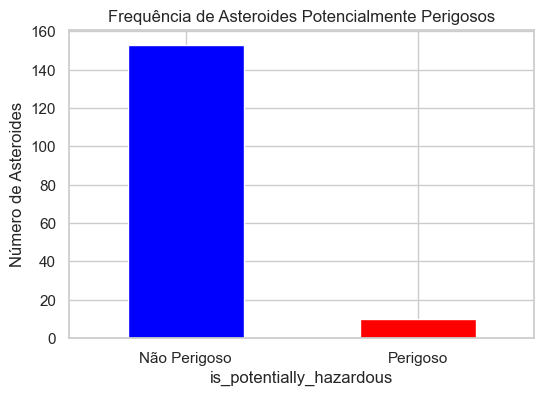

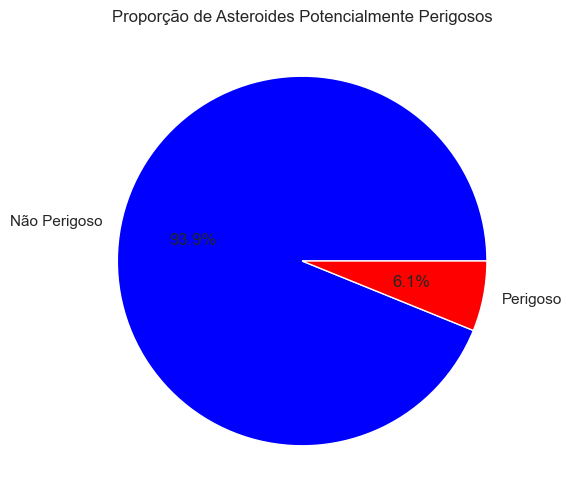

In [103]:
import matplotlib.pyplot as plt

hazardous_counts = df_asteroids['is_potentially_hazardous'].value_counts()

plt.figure(figsize=(6, 4))
hazardous_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Frequência de Asteroides Potencialmente Perigosos')
plt.xticks([0, 1], ['Não Perigoso', 'Perigoso'], rotation=0)
plt.ylabel('Número de Asteroides')
plt.show()

plt.figure(figsize=(6, 6))
hazardous_counts.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'red'], labels=['Não Perigoso', 'Perigoso'])
plt.title('Proporção de Asteroides Potencialmente Perigosos')
plt.ylabel('')  
plt.show()

 Percebe-se um desbalancamento de ateróides potencialmente perigosos e não perigosos.

## Agora saber a distribuição desses asteróides por distância da órbita da terra. Para saber se a distância está ligada com o perigo

is_potentially_hazardous  False  True 
distance_range                        
<0.01 UA                     11      0
0.01-0.1 UA                  37      2
0.1-1 UA                    105      8
1-10 UA                       0      0
>10 UA                        0      0


/var/folders/2y/w0k2g57j60scys4qmyx_fx0r0000gn/T/ipykernel_79931/2873351939.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distance_proportions = df_asteroids.groupby(['distance_range', 'is_potentially_hazardous']).size().unstack()


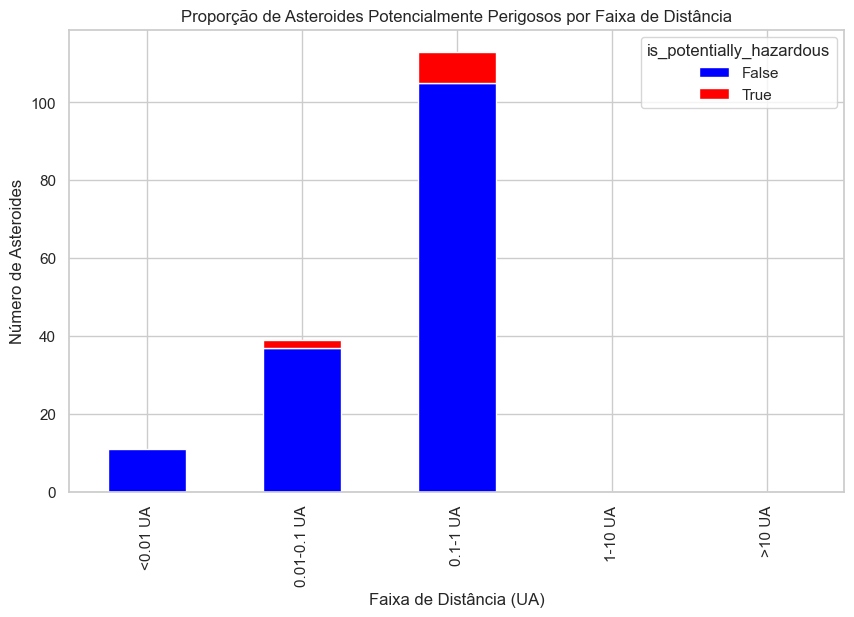

In [104]:
df_asteroids['miss_distance_astronomical'] = pd.to_numeric(df_asteroids['miss_distance_astronomical'], errors='coerce')

bins = [0, 0.01, 0.1, 1, 10, 100]
labels = ['<0.01 UA', '0.01-0.1 UA', '0.1-1 UA', '1-10 UA', '>10 UA']

df_asteroids['distance_range'] = pd.cut(df_asteroids['miss_distance_astronomical'], bins=bins, labels=labels)

distance_proportions = df_asteroids.groupby(['distance_range', 'is_potentially_hazardous']).size().unstack()

print(distance_proportions)

distance_proportions.plot(kind='bar', stacked=True, color=['blue', 'red'], figsize=(10, 6))
plt.title('Proporção de Asteroides Potencialmente Perigosos por Faixa de Distância')
plt.xlabel('Faixa de Distância (UA)')
plt.ylabel('Número de Asteroides')
plt.show()

Esse gráfico demonstra que a maioria dos asteroides próximos à Terra (com distâncias menores que 1 UA) não são considerados potencialmente perigosos. No entanto, observa-se que dentro de faixas de distância muito próximas, como entre 0.01-0.1 UA e 0.1-1 UA, ainda existem asteroides classificados como potencialmente perigosos. Isso indica que a distância por si só não é o único fator determinante para classificar um asteroide como perigoso.

Fatores adicionais, como o tamanho, a velocidade relativa e outros parâmetros orbitais, provavelmente também influenciam a classificação de periculosidade, mesmo para asteroides que se encontram em faixas de distância semelhantes.

## Analisar a correlação de outras váriaveis com o perigo, para saber o que também pode ser importante para determinar o asteróide como sendo perigoso ou não

/var/folders/2y/w0k2g57j60scys4qmyx_fx0r0000gn/T/ipykernel_79931/4134355987.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  faixa_1['is_potentially_hazardous'] = faixa_1['is_potentially_hazardous'].astype(int)
/var/folders/2y/w0k2g57j60scys4qmyx_fx0r0000gn/T/ipykernel_79931/4134355987.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  faixa_2['is_potentially_hazardous'] = faixa_2['is_potentially_hazardous'].astype(int)


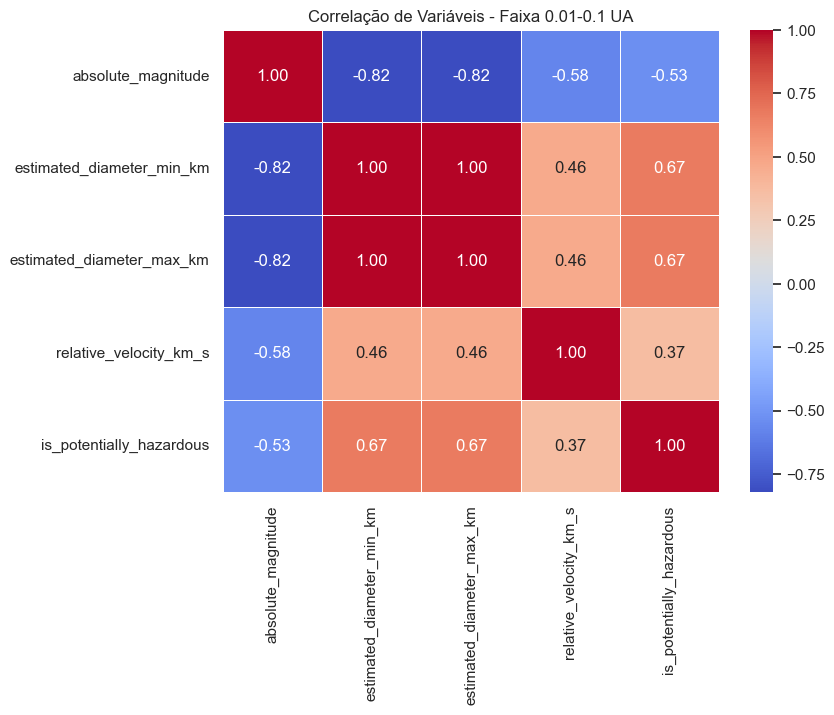

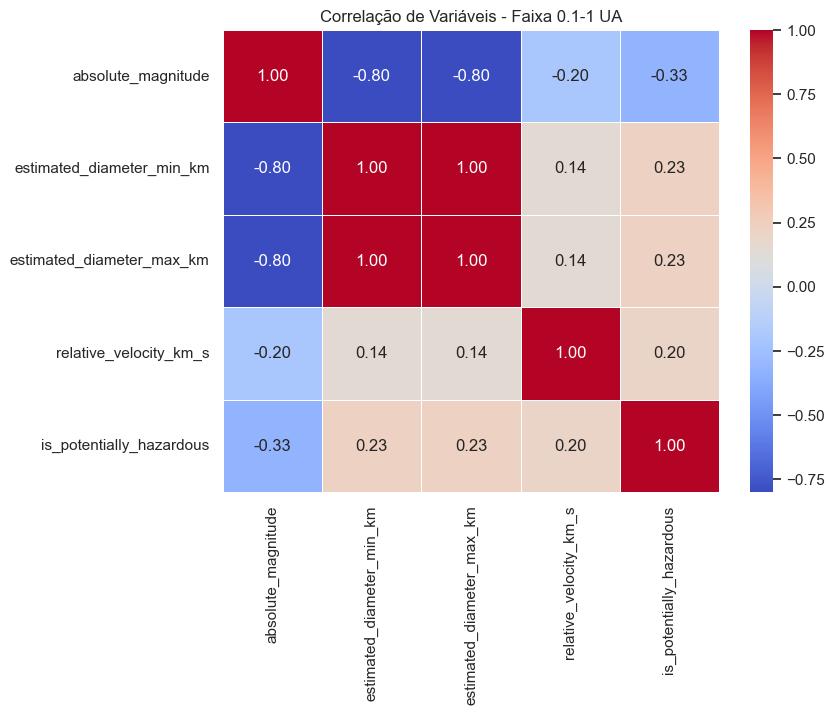

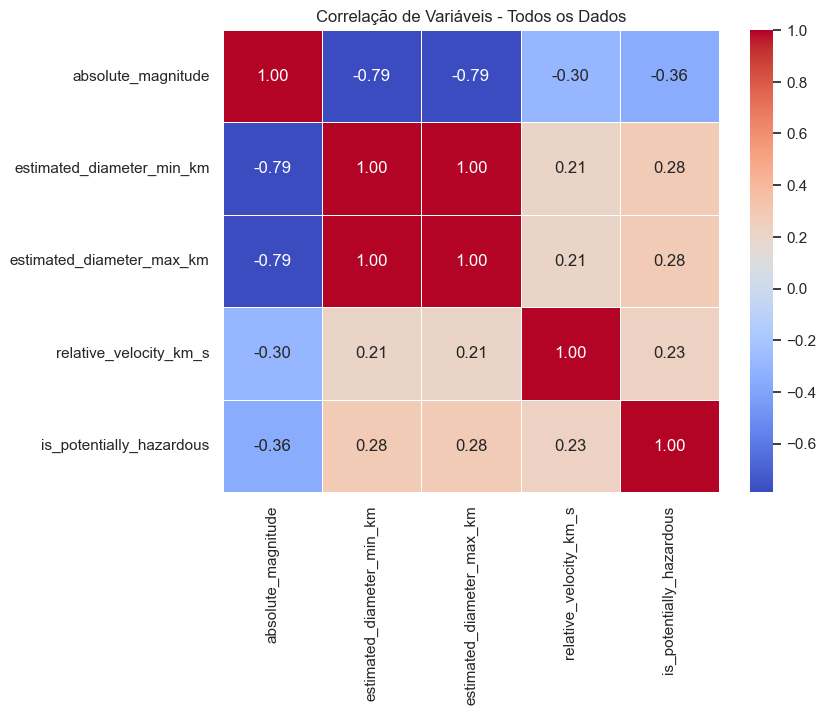

In [114]:
import seaborn as sns

faixa_1 = df_asteroids[df_asteroids['distance_range'] == '0.01-0.1 UA']
faixa_2 = df_asteroids[df_asteroids['distance_range'] == '0.1-1 UA']

numeric_columns = ['absolute_magnitude', 'estimated_diameter_min_km', 'estimated_diameter_max_km', 'relative_velocity_km_s']

faixa_1['is_potentially_hazardous'] = faixa_1['is_potentially_hazardous'].astype(int)
faixa_2['is_potentially_hazardous'] = faixa_2['is_potentially_hazardous'].astype(int)
df_asteroids['is_potentially_hazardous'] = df_asteroids['is_potentially_hazardous'].astype(int)

correlation_faixa_1 = faixa_1[numeric_columns + ['is_potentially_hazardous']].corr()
correlation_faixa_2 = faixa_2[numeric_columns + ['is_potentially_hazardous']].corr()

# Heatmap para a faixa 0.01-0.1 UA
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_faixa_1, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlação de Variáveis - Faixa 0.01-0.1 UA')
plt.show()

# Heatmap para a faixa 0.1-1 UA
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_faixa_2, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlação de Variáveis - Faixa 0.1-1 UA')
plt.show()

# Heatmap para todos os dados (todas as faixas de distância)
correlation_all_data = df_asteroids[numeric_columns + ['is_potentially_hazardous']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_all_data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlação de Variáveis - Todos os Dados')
plt.show()

### Conclusões Baseadas nos Heatmaps

#### Faixa 0.01-0.1 UA:
1. **Diâmetro Estimado**:
   - Correlação Positiva Forte: As variáveis de diâmetro estimado (mínimo e máximo) têm uma correlação de **0.68** com `is_potentially_hazardous`. Asteroides maiores nesta faixa são mais propensos a serem classificados como perigosos.
   
2. **Magnitude Absoluta**:
   - Correlação Negativa Moderada: A magnitude absoluta tem correlação de **-0.57** com `is_potentially_hazardous`. Asteroides mais brilhantes tendem a ser considerados mais perigosos nesta faixa.

3. **Velocidade Relativa**:
   - Correlação Moderada: A velocidade relativa tem correlação de **0.45** com `is_potentially_hazardous`. Asteroides mais rápidos também tendem a ser classificados como perigosos, mas o impacto é menor comparado ao diâmetro.

#### Faixa 0.1-1 UA:
1. **Diâmetro Estimado**:
   - Correlação Positiva Baixa: Diâmetros estimados (mínimo e máximo) têm correlação baixa (**0.23**) com `is_potentially_hazardous`. O impacto do diâmetro nesta faixa é menor comparado à faixa mais próxima.

2. **Magnitude Absoluta**:
   - Correlação Negativa Fraca: A magnitude absoluta tem correlação de **-0.33** com `is_potentially_hazardous`. Asteroides mais brilhantes têm uma leve tendência a serem perigosos, mas o impacto é menor que na faixa mais próxima.

3. **Velocidade Relativa**:
   - Correlação Muito Fraca: A correlação da velocidade relativa é muito fraca (**0.20**), sugerindo que a velocidade tem pouca influência nesta faixa.

### Conclusões Gerais:
1. **Distâncias Menores (0.01-0.1 UA)**:
   - O diâmetro estimado e a magnitude absoluta são os fatores mais influentes na classificação de asteroides perigosos. Asteroides maiores e mais brilhantes são mais propensos a serem perigosos.
   - A velocidade relativa também tem uma correlação moderada, sugerindo que asteroides mais rápidos podem ser ligeiramente mais perigosos nessa faixa.

2. **Distâncias Maiores (0.1-1 UA)**:
   - O impacto do diâmetro e da magnitude absoluta é muito mais fraco, sugerindo que esses fatores são menos importantes em distâncias maiores.
   - A velocidade relativa tem pouca influência nesta faixa, indicando que não é um bom preditor de periculosidade.

### Conclusão Final:
- **Distância menor (0.01-0.1 UA)**: Diâmetro e brilho (magnitude absoluta) são determinantes para classificar asteroides como perigosos.
- **Distância maior (0.1-1 UA)**: Esses fatores têm uma influência mais fraca, e outros fatores podem contribuir para a classificação de periculosidade.

### Heatmap Geral - Todos os Dados

No heatmap que analisa **todos os dados** (não apenas faixas específicas de distância), podemos observar algumas correlações importantes entre as variáveis e a classificação de "potencialmente perigoso":

1. **Magnitude Absoluta**:
   - Correlação Moderada: A magnitude absoluta tem uma correlação negativa de **-0.36** com `is_potentially_hazardous`. Isso sugere que, em geral, asteroides mais brilhantes tendem a ser considerados mais perigosos.

2. **Diâmetro Estimado (Mínimo e Máximo)**:
   - Correlação Positiva: Tanto o diâmetro estimado mínimo quanto o máximo têm correlações de **0.28** com `is_potentially_hazardous`. Embora essa correlação seja positiva, ela é mais fraca em comparação com a análise de faixas de distância menores, o que indica que, ao considerar todos os dados, o tamanho do asteroide ainda tem influência, mas não tão forte quanto nas faixas mais próximas.

3. **Velocidade Relativa**:
   - Correlação Fraca: A correlação entre a velocidade relativa e `is_potentially_hazardous` é de **0.23**, o que indica que a velocidade não é um fator muito forte na classificação de periculosidade, quando consideramos todos os dados.

### Impacto do Desbalanceamento das Classes

É importante destacar que, como **apenas 6% dos asteroides** no conjunto de dados são classificados como potencialmente perigosos, há um **desbalanceamento significativo de classes**. Esse desbalanceamento afeta diretamente as correlações observadas:

1. **Efeito do Desbalanceamento**:
   - Com a maioria dos asteroides sendo não perigosos, as variáveis que poderiam se correlacionar com a periculosidade acabam sendo "diluídas" pela predominância de asteroides não perigosos. Isso faz com que as correlações pareçam mais fracas quando analisamos todos os dados.

2. **Dificuldade de Identificação**:
   - O desbalanceamento dificulta a identificação clara de padrões nas variáveis que diferenciam os asteroides perigosos, pois os dados da classe majoritária (não perigosa) obscurecem a influência das variáveis importantes para a classe minoritária.

3. **Impacto nas Métricas**:
   - Como resultado, a **força da correlação** das variáveis com a periculosidade diminui quando analisamos o conjunto completo, ao contrário do que ocorre em subconjuntos de dados mais equilibrados, como em faixas de distância específicas.

### Conclusão:

O desbalanceamento nas classes, com apenas 6% de asteroides classificados como perigosos, afeta a análise geral, fazendo com que as correlações sejam mais difíceis de identificar e resultem em valores menores. Mesmo assim, o diâmetro e a magnitude absoluta ainda demonstram algum grau de influência na classificação de periculosidade, embora em menor intensidade do que nas faixas de distância mais próximas.

## Depois de determinar outros fatores que ajudam nessa classificacão, analisar, por faixa de distância, a distribuição dessas outras variáveis, entre asteróides perigosos e não perigosos

/var/folders/2y/w0k2g57j60scys4qmyx_fx0r0000gn/T/ipykernel_79931/743935201.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  faixa_2['is_potentially_hazardous'] = faixa_2['is_potentially_hazardous'].astype(str)
/var/folders/2y/w0k2g57j60scys4qmyx_fx0r0000gn/T/ipykernel_79931/743935201.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_potentially_hazardous', y='estimated_diameter_min_km', data=faixa_2, palette=['blue', 'red'])


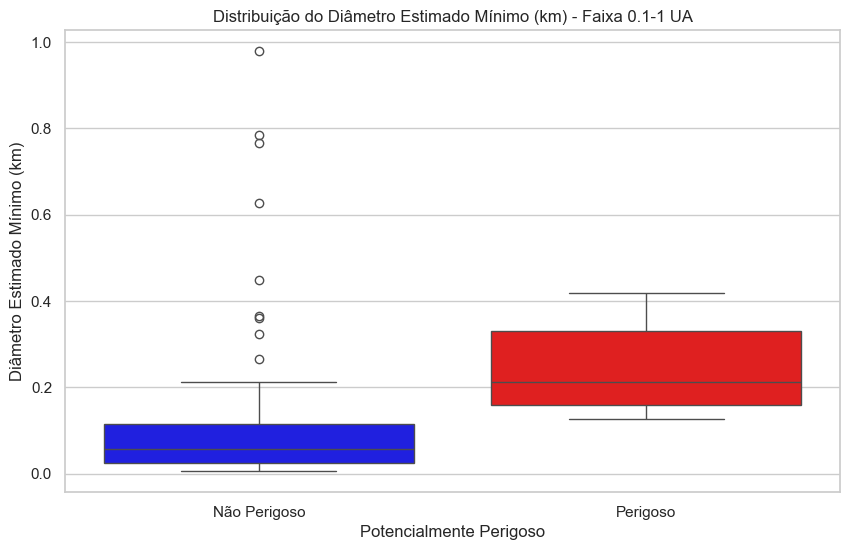

/var/folders/2y/w0k2g57j60scys4qmyx_fx0r0000gn/T/ipykernel_79931/743935201.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_potentially_hazardous', y='estimated_diameter_max_km', data=faixa_2, palette=['blue', 'red'])


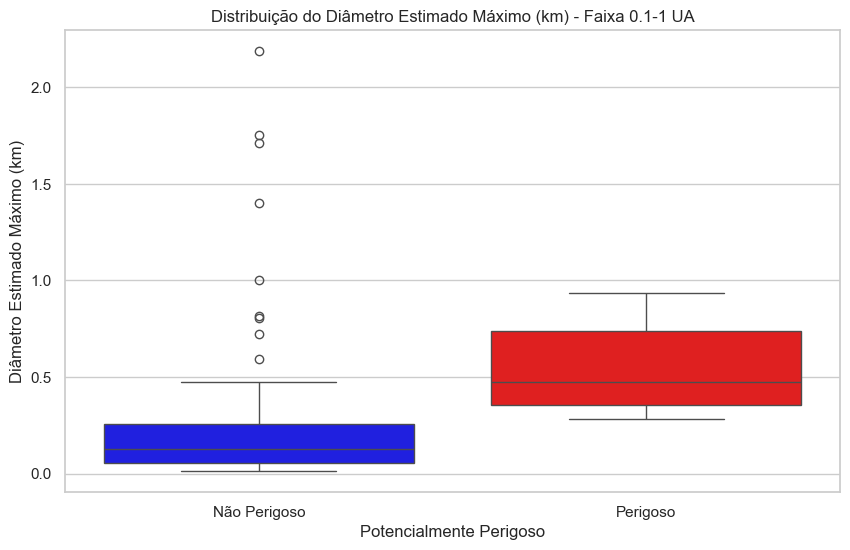

/var/folders/2y/w0k2g57j60scys4qmyx_fx0r0000gn/T/ipykernel_79931/743935201.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_potentially_hazardous', y='absolute_magnitude', data=faixa_2, palette=['blue', 'red'])


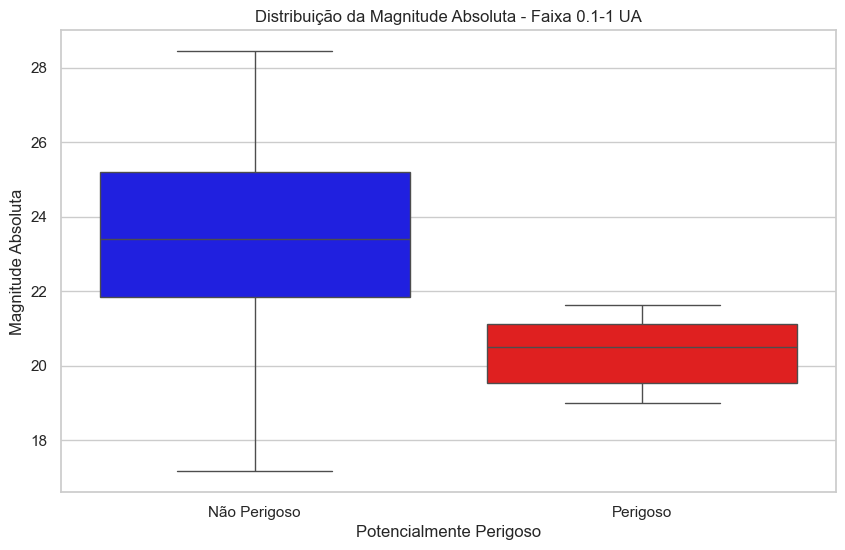

/var/folders/2y/w0k2g57j60scys4qmyx_fx0r0000gn/T/ipykernel_79931/743935201.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_potentially_hazardous', y='relative_velocity_km_s', data=faixa_2, palette=['blue', 'red'])


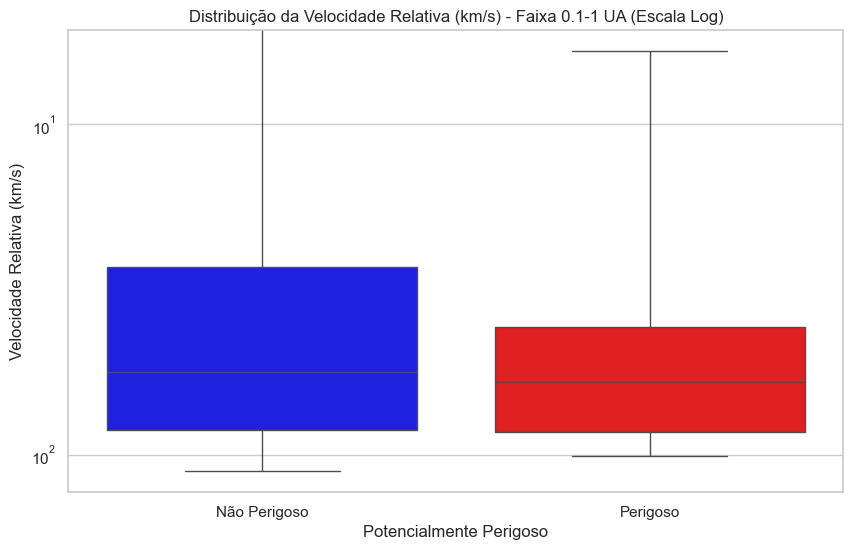

In [106]:
faixa_2 = df_asteroids[df_asteroids['distance_range'] == '0.1-1 UA']

faixa_2['is_potentially_hazardous'] = faixa_2['is_potentially_hazardous'].astype(str)

plt.figure(figsize=(10, 6))
sns.boxplot(x='is_potentially_hazardous', y='estimated_diameter_min_km', data=faixa_2, palette=['blue', 'red'])
plt.title('Distribuição do Diâmetro Estimado Mínimo (km) - Faixa 0.1-1 UA')
plt.xlabel('Potencialmente Perigoso')
plt.ylabel('Diâmetro Estimado Mínimo (km)')
plt.xticks([0, 1], ['Não Perigoso', 'Perigoso'])
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='is_potentially_hazardous', y='estimated_diameter_max_km', data=faixa_2, palette=['blue', 'red'])
plt.title('Distribuição do Diâmetro Estimado Máximo (km) - Faixa 0.1-1 UA')
plt.xlabel('Potencialmente Perigoso')
plt.ylabel('Diâmetro Estimado Máximo (km)')
plt.xticks([0, 1], ['Não Perigoso', 'Perigoso'])
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='is_potentially_hazardous', y='absolute_magnitude', data=faixa_2, palette=['blue', 'red'])
plt.title('Distribuição da Magnitude Absoluta - Faixa 0.1-1 UA')
plt.xlabel('Potencialmente Perigoso')
plt.ylabel('Magnitude Absoluta')
plt.xticks([0, 1], ['Não Perigoso', 'Perigoso'])
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='is_potentially_hazardous', y='relative_velocity_km_s', data=faixa_2, palette=['blue', 'red'])
plt.yscale('log')  # Aplicar escala logarítmica no eixo Y
plt.title('Distribuição da Velocidade Relativa (km/s) - Faixa 0.1-1 UA (Escala Log)')
plt.xlabel('Potencialmente Perigoso')
plt.ylabel('Velocidade Relativa (km/s)')
plt.xticks([0, 1], ['Não Perigoso', 'Perigoso'])
plt.show()

#### Os resultados acima coincidiram com o que foi analisado na correlação entre as variáveis para a faixa 0.1-1UA, o diâmetro do asteroide está intimamente ligado à classificação de perigo para essa faixa de distância.

#### Percebe-se pela análise dos box plots que asteroides classificados como potencialmente perigosos apresentam uma distribuição de diâmetro estimado mínimo consideravelmente maior do que os asteroides não perigosos. Isso confirma a observação de que o tamanho do asteroide é um fator importante para sua classificação como perigoso.

#### Quanto à magnitude, também foi o que foi visto no heatmap. Asteroides potencialmente perigosos apresentam uma magnitude absoluta menor (mais brilhantes) em relação aos não perigosos. A magnitude menor está associada a uma maior periculosidade, o que está alinhado com as conclusões da correlação anterior.

#### E por fim, a velocidade segue a mesma avaliação. No caso do heatmap, a velocidade não tinha uma correlação alta com a classificação de perigosidade, e a análise dos box plots reflete isso. A velocidade relativa, mesmo em escala logarítmica, não apresenta uma diferença significativa entre asteroides perigosos e não perigosos nessa faixa de distância, sugerindo que ela não é um fator determinante para a classificação de perigo nessa faixa.

## Apenas analisar tabelas para saber os 10 asteróides mais pertos da terra, os 10 mais rápidos e os 10 maiores

In [108]:
top_10_closest_approaches = df_asteroids[['name', 'miss_distance_km', 'close_approach_date', 'is_potentially_hazardous']].sort_values(by='miss_distance_km').head(10)

def color_potentially_hazardous(val):
    if val:
        return 'color: red'
    else:
        return 'color: green'

styled_table_approaches = top_10_closest_approaches.style.applymap(color_potentially_hazardous, subset=['is_potentially_hazardous']).set_properties(subset=['is_potentially_hazardous'], **{'font-weight': 'bold'})

styled_table_approaches.set_table_attributes('style="border-collapse:collapse"').hide(axis='index')

/var/folders/2y/w0k2g57j60scys4qmyx_fx0r0000gn/T/ipykernel_79931/755131694.py:12: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_table_approaches = top_10_closest_approaches.style.applymap(color_potentially_hazardous, subset=['is_potentially_hazardous']).set_properties(subset=['is_potentially_hazardous'], **{'font-weight': 'bold'})


name,miss_distance_km,close_approach_date,is_potentially_hazardous
(2024 UG),1047432.584716128,2024-10-21,False
(2024 TX2),11408760.563400341,2024-10-18,False
(2024 TB22),11410759.175983754,2024-10-18,True
(2024 UP),11723465.772813869,2024-10-15,False
(2024 TM20),120590.483972112,2024-10-15,False
(2021 SF4),12117577.456824462,2024-10-21,False
(2022 UY),12175986.434227475,2024-10-16,False
(2024 UL),12761795.117703479,2024-10-22,False
(2024 TP3),13217941.253576961,2024-10-21,False
(2024 SA5),13328184.307197552,2024-10-19,False


In [109]:
top_10_fastest_asteroids = df_asteroids[['name', 'relative_velocity_km_s', 'close_approach_date', 'is_potentially_hazardous']].sort_values(by='relative_velocity_km_s', ascending=False).head(10)

def color_potentially_hazardous(val):
    if val:
        return 'color: red'
    else:
        return 'color: green'

styled_table_fastest = top_10_fastest_asteroids.style.applymap(color_potentially_hazardous, subset=['is_potentially_hazardous']).set_properties(subset=['is_potentially_hazardous'], **{'font-weight': 'bold'})

styled_table_fastest.set_table_attributes('style="border-collapse:collapse"').hide(axis='index')

/var/folders/2y/w0k2g57j60scys4qmyx_fx0r0000gn/T/ipykernel_79931/993946553.py:12: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_table_fastest = top_10_fastest_asteroids.style.applymap(color_potentially_hazardous, subset=['is_potentially_hazardous']).set_properties(subset=['is_potentially_hazardous'], **{'font-weight': 'bold'})


name,relative_velocity_km_s,close_approach_date,is_potentially_hazardous
(2021 TN6),9.9869841071,2024-10-17,False
(2021 XE6),9.6750353984,2024-10-22,False
(2024 UK),9.5344533274,2024-10-19,False
483547 (2003 WM25),9.3986936436,2024-10-18,False
(2024 SV5),9.316170181,2024-10-19,False
(2024 UG),9.236791796,2024-10-21,False
(2024 TC15),9.2205371483,2024-10-17,False
(2020 QP6),9.1153088486,2024-10-18,False
(2024 UM),8.700108277,2024-10-15,False
(2010 MA),8.5877838298,2024-10-18,False


In [116]:
df_asteroids['estimated_diameter_avg_km'] = (df_asteroids['estimated_diameter_min_km'] + df_asteroids['estimated_diameter_max_km']) / 2

df_asteroids['is_potentially_hazardous'] = df_asteroids['is_potentially_hazardous'].map({0: 'False', 1: 'True'})

top_10_largest_asteroids = df_asteroids[['name', 'estimated_diameter_avg_km', 'is_potentially_hazardous']].sort_values(by='estimated_diameter_avg_km', ascending=False).head(10)

def color_potentially_hazardous(val):
    if val == 'True':
        return 'color: red'
    else:
        return 'color: green'

styled_table_largest_asteroids = top_10_largest_asteroids.style.applymap(color_potentially_hazardous, subset=['is_potentially_hazardous']).set_properties(subset=['is_potentially_hazardous'], **{'font-weight': 'bold'})

styled_table_largest_asteroids.set_table_attributes('style="border-collapse:collapse"').hide(axis='index')

/var/folders/2y/w0k2g57j60scys4qmyx_fx0r0000gn/T/ipykernel_79931/3054606984.py:18: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_table_largest_asteroids = top_10_largest_asteroids.style.applymap(color_potentially_hazardous, subset=['is_potentially_hazardous']).set_properties(subset=['is_potentially_hazardous'], **{'font-weight': 'bold'})


name,estimated_diameter_avg_km,is_potentially_hazardous
2202 Pele (1972 RA),1.583225,False
483547 (2003 WM25),1.269237,False
495615 (2015 PQ291),1.240345,False
(2002 RD27),1.012844,False
211871 (2004 HO),0.727014,False
(2017 TV4),0.678489,True
(2024 TN1),0.604704,True
(2024 NN11),0.590939,False
(2024 TB22),0.583099,True
162911 (2001 LL5),0.582831,False


## Uma última análise para saber a relacão entre velocidade e tamanho, e a quantidade de asteróides por diâmetro

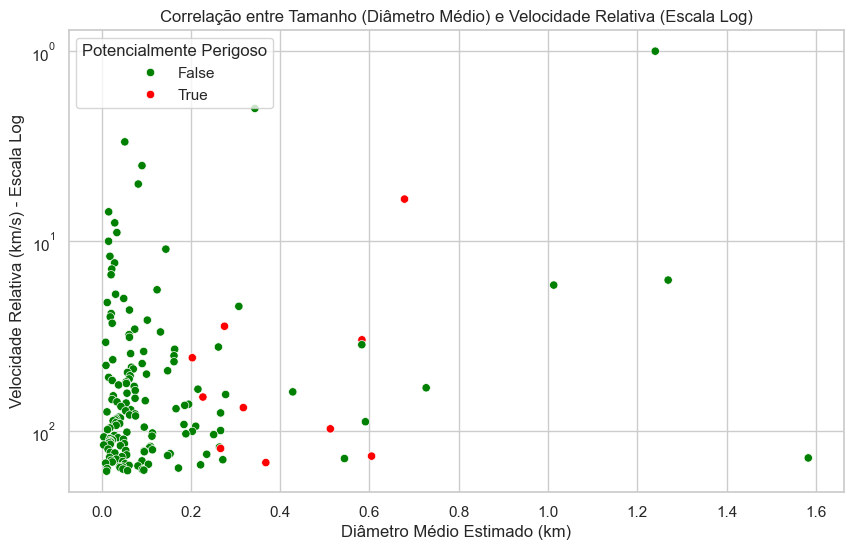

In [110]:
df_asteroids['estimated_diameter_avg_km'] = (df_asteroids['estimated_diameter_min_km'] + df_asteroids['estimated_diameter_max_km']) / 2

plt.figure(figsize=(10, 6))
sns.scatterplot(x='estimated_diameter_avg_km', y='relative_velocity_km_s', data=df_asteroids, hue='is_potentially_hazardous', palette=['green', 'red'])
plt.yscale('log')  # Aplicar escala logarítmica no eixo Y
plt.title('Correlação entre Tamanho (Diâmetro Médio) e Velocidade Relativa (Escala Log)')
plt.xlabel('Diâmetro Médio Estimado (km)')
plt.ylabel('Velocidade Relativa (km/s) - Escala Log')
plt.legend(title='Potencialmente Perigoso')
plt.grid(True)
plt.show()

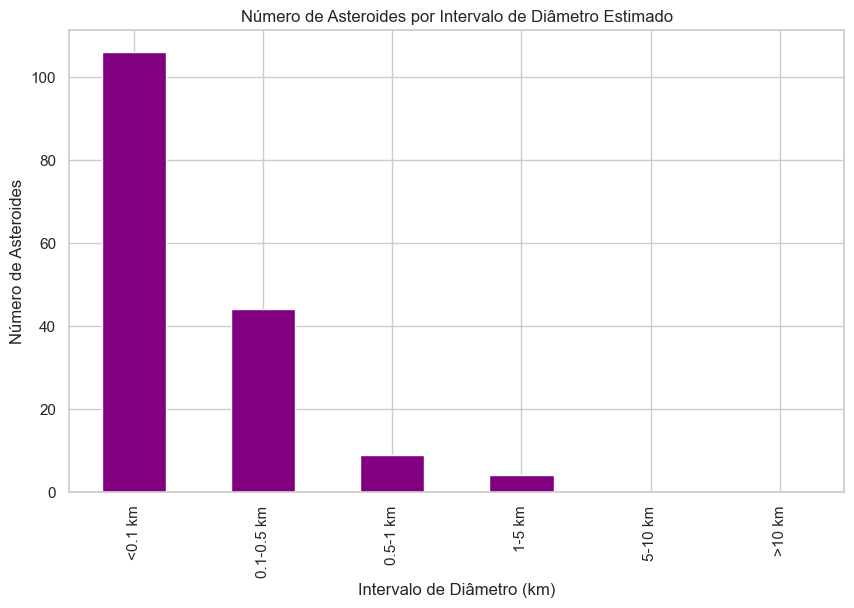

In [111]:
bins_diameter = [0, 0.1, 0.5, 1, 5, 10, 50]
labels_diameter = ['<0.1 km', '0.1-0.5 km', '0.5-1 km', '1-5 km', '5-10 km', '>10 km']

df_asteroids['diameter_range'] = pd.cut(df_asteroids['estimated_diameter_avg_km'], bins=bins_diameter, labels=labels_diameter)

diameter_counts = df_asteroids['diameter_range'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
diameter_counts.plot(kind='bar', color='purple')
plt.title('Número de Asteroides por Intervalo de Diâmetro Estimado')
plt.xlabel('Intervalo de Diâmetro (km)')
plt.ylabel('Número de Asteroides')
plt.show()

### Correlação entre Tamanho (Diâmetro Médio) e Velocidade Relativa

#### Percebe-se que há uma pequena relação entre tamanho e velocidade. Ateróides mais rápidos tendem a ser mais devagar, mas não é um comportamento constatnte 

### Número de Asteroides por Intervalo de Diâmetro Estimado

### Asteroides Pequenos (<0.1 km): A maioria dos asteroides é pequena
### Asteroides Grandes (>1 km): São mais raros
### Percebe-se que conforme vai aumentando o diâmetro do asteróide, vai diminuindo a quantidade observada 